In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import plotly
import plotly.express as px


In [46]:
df = pd.read_csv("stroke.csv")

In [47]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

## Data visualization

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [49]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [50]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [51]:
df_2 = df.dropna()

In [52]:
df_2["stroke"].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [56]:
df_2.corr()

id       age  hypertension  heart_disease  \
id                 1.000000  0.008984      0.001147       0.004016   
age                0.008984  1.000000      0.274425       0.257123   
hypertension       0.001147  0.274425      1.000000       0.115991   
heart_disease      0.004016  0.257123      0.115991       1.000000   
avg_glucose_level  0.006409  0.235838      0.180543       0.154525   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.004839  0.232331      0.142515       0.137938   

                   avg_glucose_level       bmi    stroke  
id                          0.006409  0.003084  0.004839  
age                         0.235838  0.333398  0.232331  
hypertension                0.180543  0.167811  0.142515  
heart_disease               0.154525  0.041357  0.137938  
avg_glucose_level           1.000000  0.175502  0.138936  
bmi                         0.175502  1.000000  0.042374  
stroke                      0.138936  0.042374  1.000000

<AxesSubplot:>

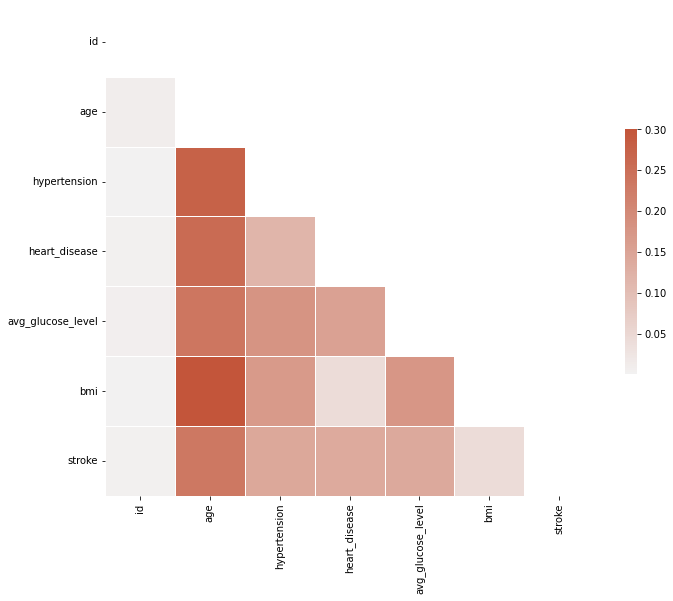

In [54]:
# Compute the correlation matrix
corr = df_2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Figure size 720x720 with 0 Axes>

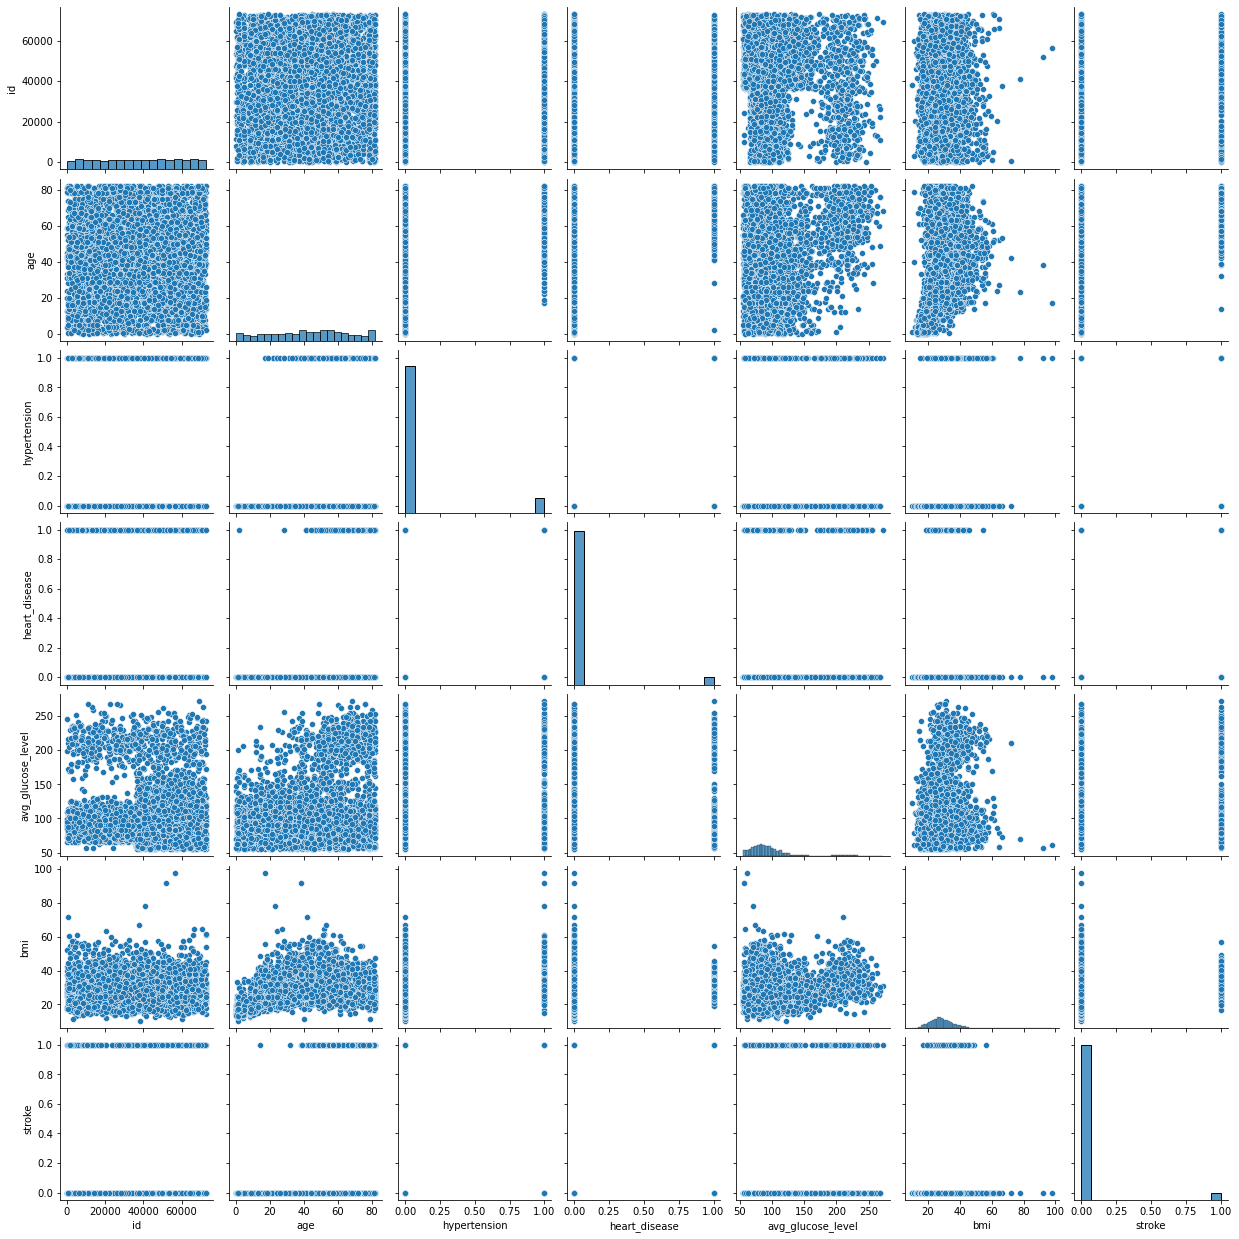

In [55]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(df_2)
plt.show()

In [41]:
fig = px.scatter(df, x='age', y='bmi', title='Age & BMI ',color='stroke', hover_data = df[['stroke']])
fig.show()

In [44]:
fig = px.scatter(df, x='age', y='avg_glucose_level', title='Age & avg_glucose_level ',color='stroke', hover_data = df[['stroke']])
fig.show()